<span style="font-family: Arial; font-weight:bold;font-size:3em;color:#0e92ea;">  Project - Statistics

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;"> Name: Panagam Mohitha

**Domain:** Healthcare, Insurance

**Context:** Leveraging customer information is paramount for most businesses. In the case of an insurance company, 
attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, 
knowing to explore and generate value out of such data can be an invaluable skill to have. 

**Data Description:** Insurance.csv - The data at hand contains medical costs of people characterized by certain attributes. 

**Attribute Information:** 
* **age:** age of primary beneficiary 
* **sex:** insurance contractor gender, female, male 
* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
* **children:** Number of children covered by health insurance / Number of dependents 
* **smoker:** Smoking 
* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. 
* **charges:** Individual medical costs billed by health insurance. 

**Objective:** We want to see if we can dive deep into this data to find some valuable insights. 

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00008B;">  Task-1 Importing the library:

In [364]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chisquare,chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import copy

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00008B;"> Task-2 Read data as Data frame:


In [365]:
Insurance_data = pd.read_csv('C:\\Users\\Mohitha Panagam\\Downloads\\PROJECT\\insurance.csv') 

In [366]:
Insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00008B;"> Task-3 Perform Basic EDA:

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> 3.a. Shape of the data

In [367]:
Insurance_data.shape

(1338, 7)

 **Inference:** 
 * There are 1338 Observations / Rows and 7 Attributes / Columns.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  3.b. Data type of each attribute 

In [368]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Inference:**
* Here The attribute 'sex','smoker' and 'region' is of type object i.e categorical variable.
* Rest all other attributes are of int and float type. 
* We could also see there are no missing values found in the data.
* Also, all the attributes have no-null data.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> 3.c. Checking the presence of missing values 

In [369]:
Insurance_data.isnull().values.any()

False

In [370]:
Insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Inference:**
* 'isnull' function used to check missing values in dataframe.
* Here, "False" denotes the absence of missing values.
* No missing and null value present in the dataframe.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  3.d. 5 point summary of numerical attributes

In [371]:
Insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Inference:**
* Age attribute shows good representation of adult population age from 18-64.
* Most of the population i.e., 75% of the people have 2 or less children.
* The attribute charges is highly skewed as major section of people opt for basic plan.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  3.e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 

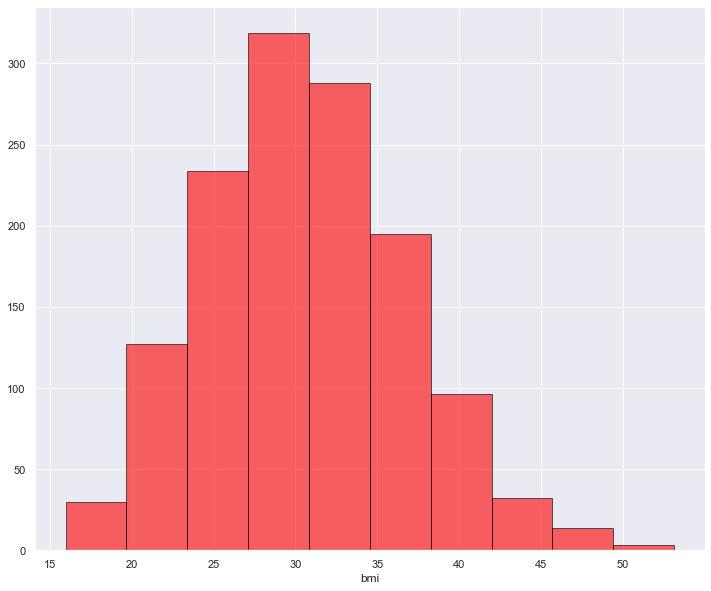

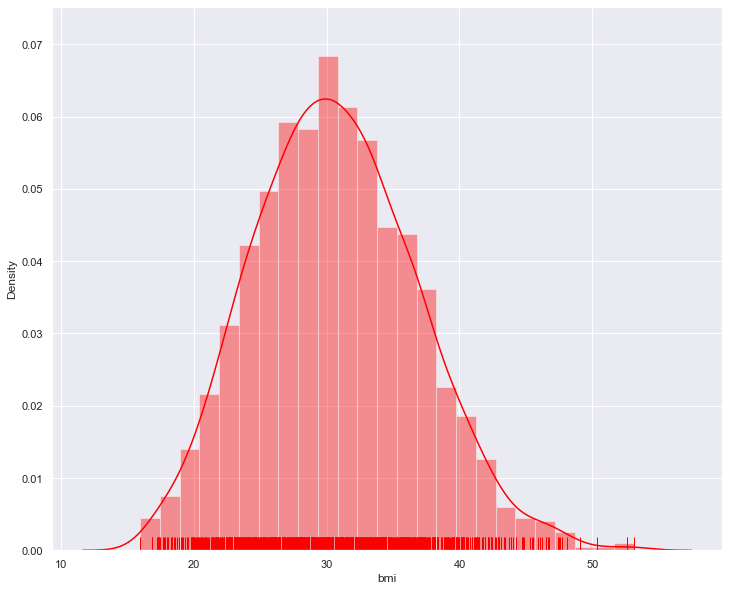

In [372]:
plt.figure(figsize= (12,10))
plt.hist(Insurance_data.bmi, color='Red', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')


plt.figure(figsize= (12,10))
sns.distplot(Insurance_data['bmi'], color='red', kde=True, rug=True );
plt.show()

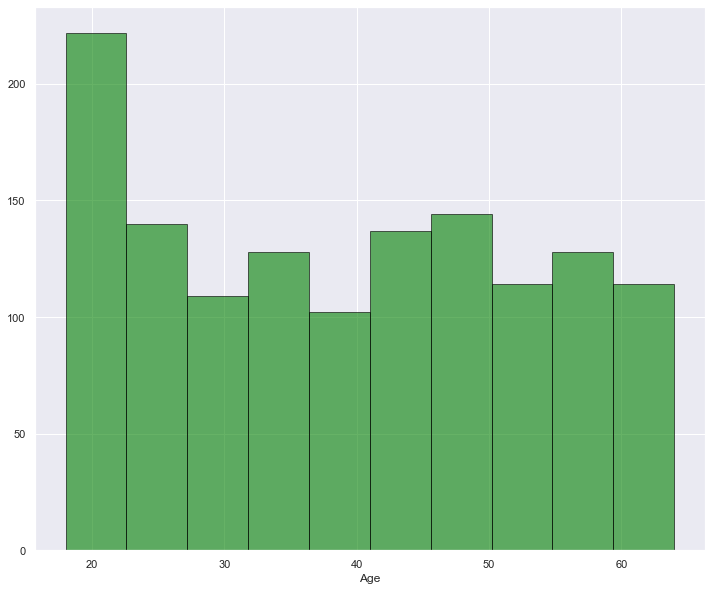

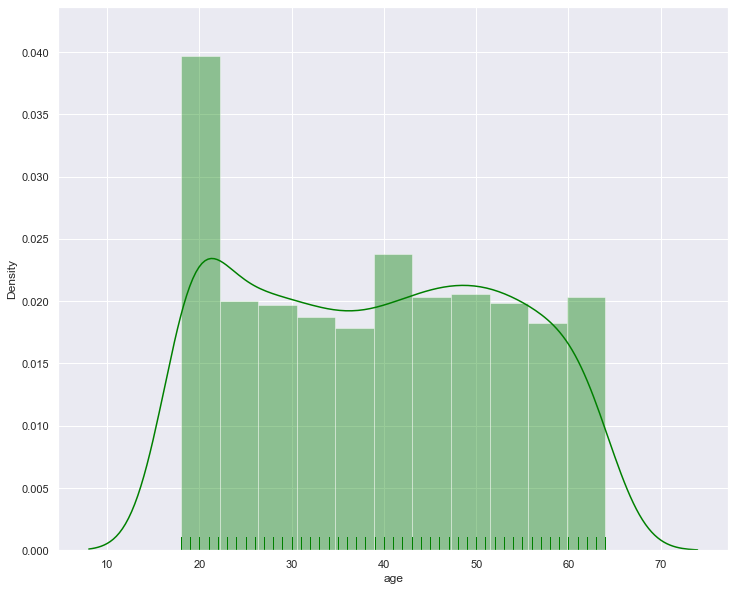

In [373]:
plt.figure(figsize= (12,10))
plt.hist(Insurance_data.age, color='green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('Age')


plt.figure(figsize= (12,10))
sns.distplot(Insurance_data['age'], color='green', kde=True, rug=True );
plt.show()

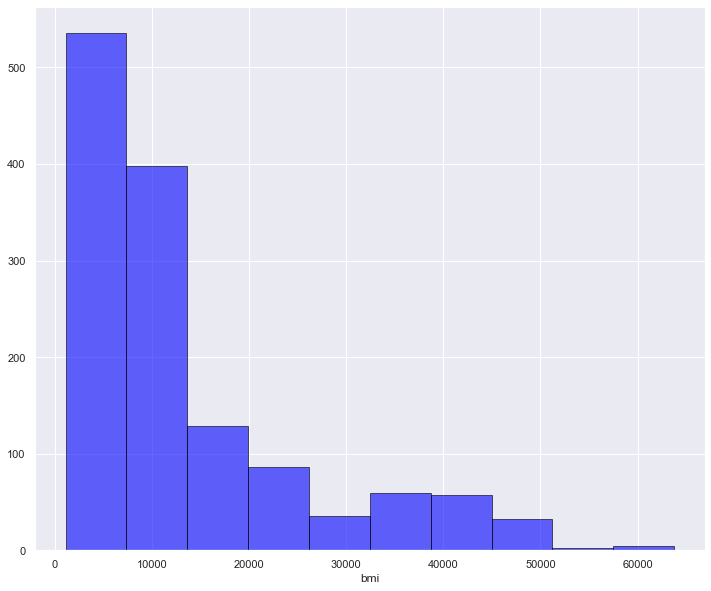

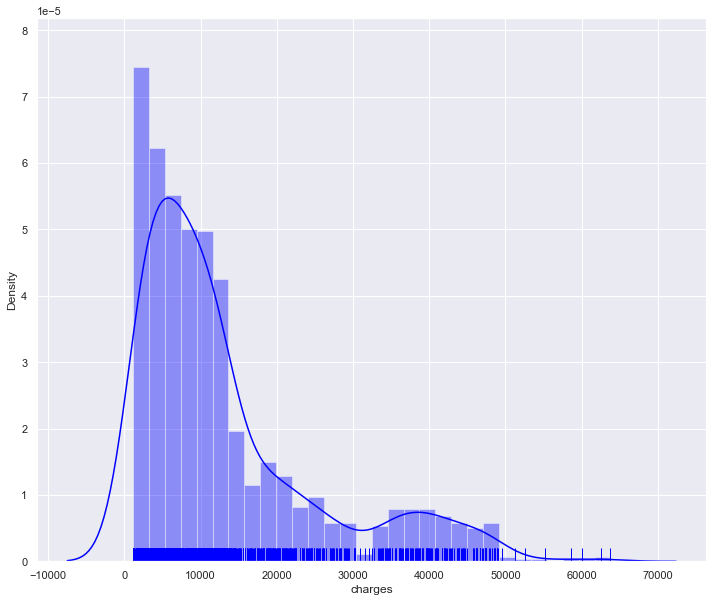

In [374]:
plt.figure(figsize= (12,10))
plt.hist(Insurance_data.charges, color='blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('bmi')


plt.figure(figsize= (12,10))
sns.distplot(Insurance_data['charges'], color='blue', kde=True, rug=True );
plt.show()

**Inference:**
* The distant plot of BMI represents almost normal distribution but it is moderately skewed.
* Age distribution shows uniform distribution.
* The distribution of Charges is skewed towards right i.e., positively skew.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns  

In [375]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(Insurance_data.bmi),
                                       stats.skew(Insurance_data.age),stats.skew(Insurance_data.charges)]},
                        index=['bmi','age','charges'])
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


**Inference:**
* The skewness of BMI shows that it is moderately skewed.
* Age skewnes shows no or very less skewness.
* The distribution of Charges is skewed towards right i.e., positively skew.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  3.g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [376]:
sns.set(style="whitegrid")

Outliers are present
Identified outliers for bmi: 9


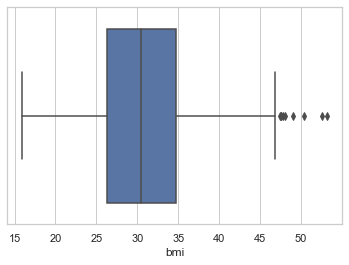

In [377]:
sns.boxplot(Insurance_data["bmi"])
Q1 = np.percentile(Insurance_data['bmi'], 25)
Q3 = np.percentile(Insurance_data['bmi'], 75)
IQR = Q3 - Q1

bmi_outliers = [x for x in Insurance_data['bmi'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
if len(bmi_outliers) > 0:
	print('Outliers are present')
else:
	print('No outliers are identified')
print('Identified outliers for bmi:', len(bmi_outliers))

No outliers are identified
Identified outliers for age: 0


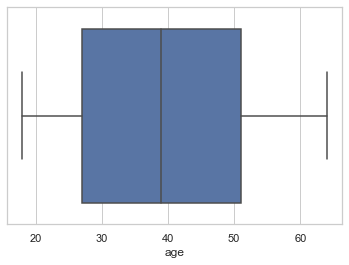

In [378]:
sns.boxplot(Insurance_data["age"])
Q1 = np.percentile(Insurance_data['age'], 25)
Q3 = np.percentile(Insurance_data['age'], 75)
IQR = Q3 - Q1

age_outliers = [x for x in Insurance_data['age'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
if len(age_outliers) > 0:
	print('Outliers are present')
else:
	print('No outliers are identified')
print('Identified outliers for age:', len(age_outliers))

Outliers are present
Identified outliers for charges: 139


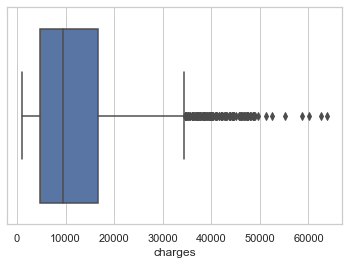

In [379]:
sns.boxplot(Insurance_data["charges"])
Q1 = np.percentile(Insurance_data['charges'], 25)
Q3 = np.percentile(Insurance_data['charges'], 75)
IQR = Q3 - Q1

charges_outliers = [x for x in Insurance_data['charges'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
if len(charges_outliers) > 0:
	print('Outliers are present')
else:
	print('No outliers are identified')
print('Identified outliers for charges:', len(charges_outliers))

**Inference:**
* The number of outliers identified in attributes bmi, age, charges are 9, 0, 139 respectively.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  3.h. Distribution of categorical columns (include children) 

<AxesSubplot:xlabel='children', ylabel='count'>

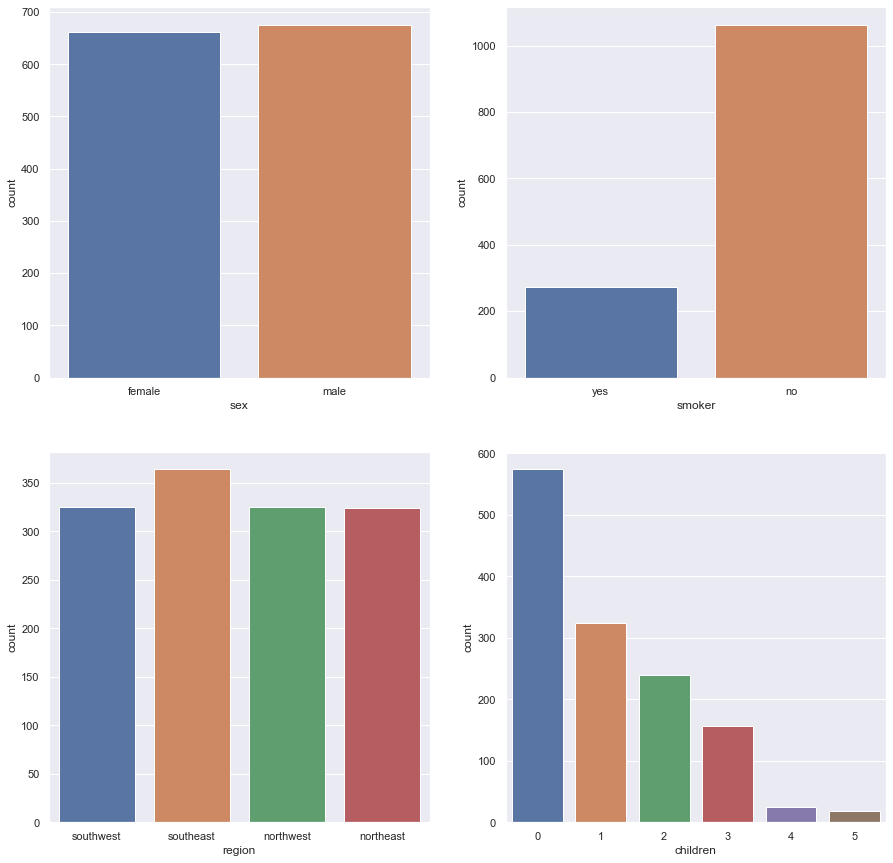

In [380]:
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.countplot(Insurance_data['sex'], ax=axes[0,0])
sns.countplot(Insurance_data['smoker'],ax=axes[0,1])
sns.countplot(Insurance_data['region'], ax=axes[1,0])
sns.countplot(Insurance_data['children'], ax=axes[1,1])

<AxesSubplot:xlabel='children', ylabel='charges'>

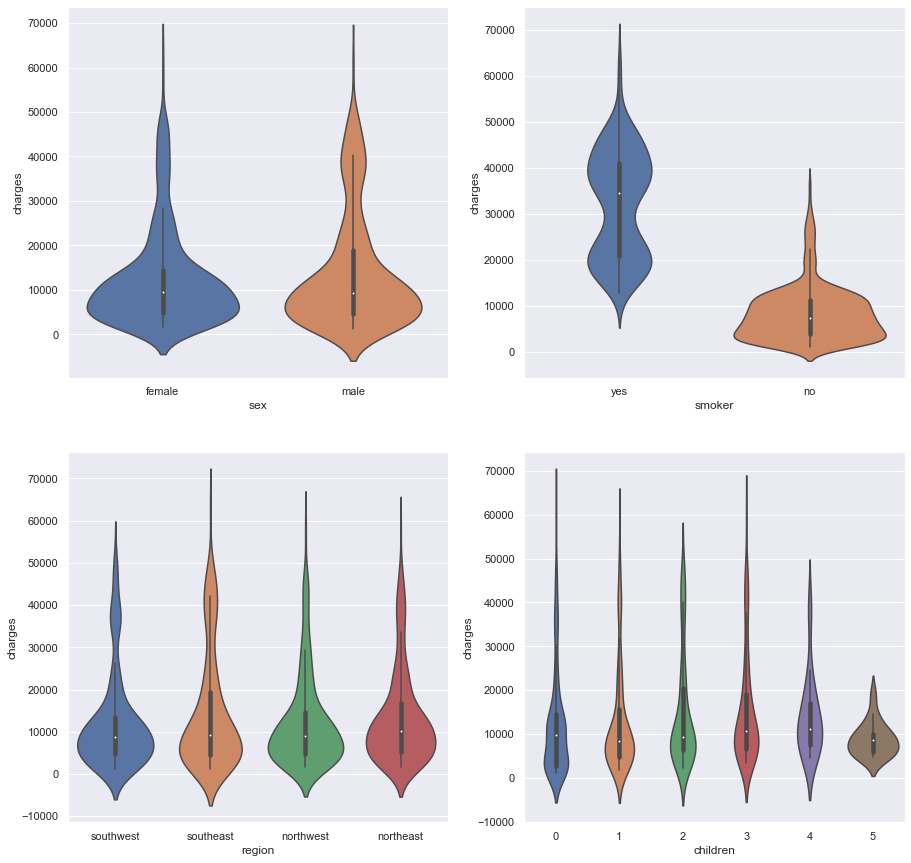

In [381]:
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.violinplot(y='charges', x='sex', data=Insurance_data, split=True, ax=axes[0,0])
sns.violinplot(y='charges', x='smoker', data=Insurance_data, split=True, ax=axes[0,1])
sns.violinplot(y='charges', x='region', data=Insurance_data, split=True, ax=axes[1,0])
sns.violinplot(y='charges', x='children', data=Insurance_data, split=True, ax=axes[1,1])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  3.i. Pair plot that includes all the columns of the data frame 

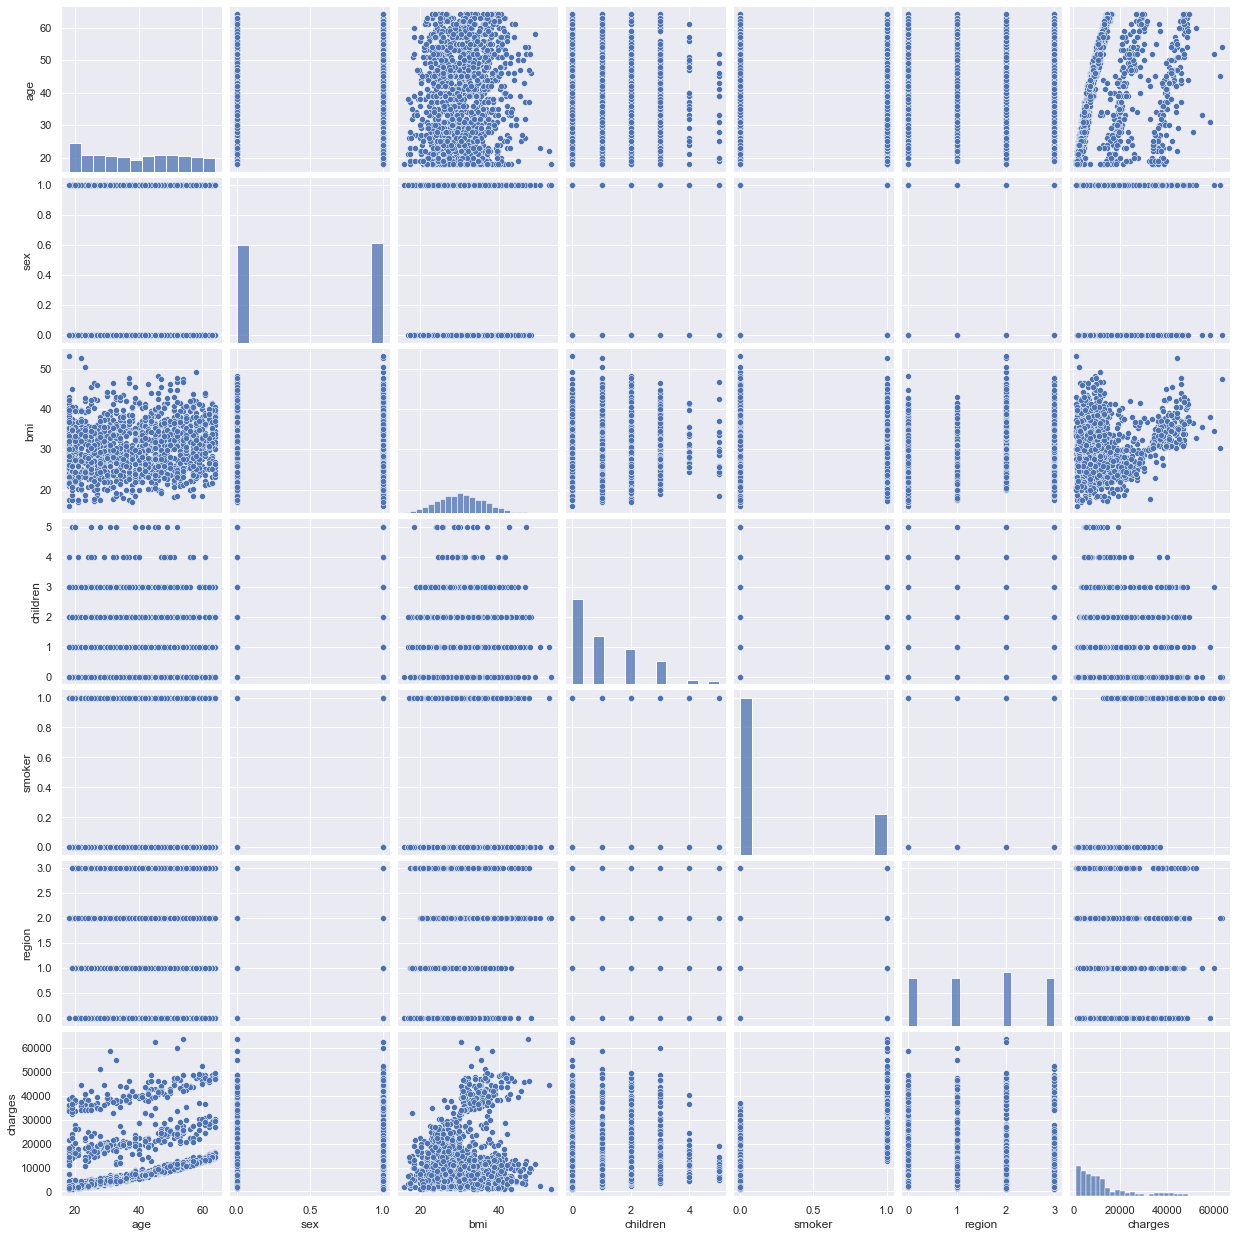

In [382]:
Insurance_data_encoded = Insurance_data.copy()
Insurance_data_encoded.loc[:,['sex', 'smoker', 'region']] = Insurance_data.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)
sns.pairplot(Insurance_data_encoded)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;"> Task-4 Answer the following Questions:

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  4.a) Do charges of people who smoke differ significantly from the people who don't? 

In [383]:
Insurance_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

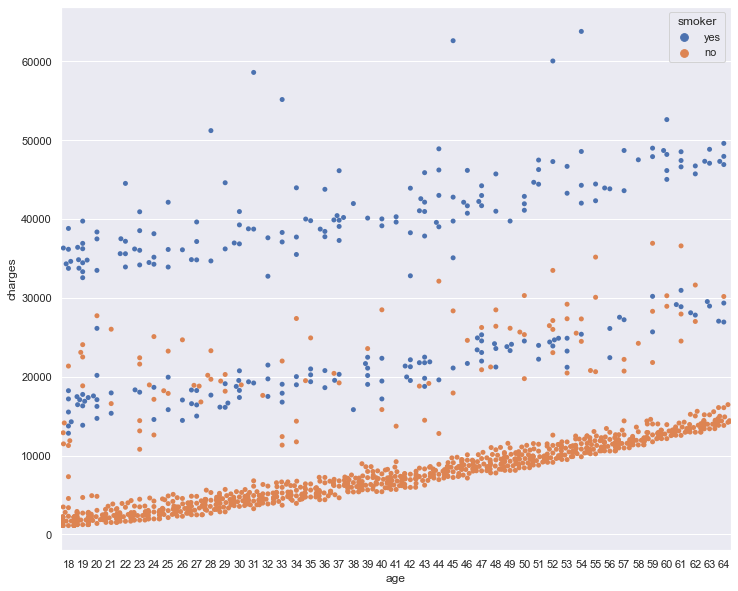

In [384]:
plt.figure(figsize=(12,10))
sns.swarmplot(y='charges',x='age',hue='smoker',data=Insurance_data)
plt.show()

In [385]:
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(Insurance_data[Insurance_data.smoker == 'yes'].charges) 
y = np.array(Insurance_data[Insurance_data.smoker == 'no'].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)   
print('P value = ' , p_value)
if p_value > 0.05:
	print('Charges of people who smoke doesnt differ significantly from the people who do not (accept H0)')
else:
	print('Charges of people who smoke differ significantly from the people who do not (reject H0)')

P value =  8.271435842179102e-283
Charges of people who smoke differ significantly from the people who do not (reject H0)


**Inference:**
* There are 1064 non-smokers and 274 smokers
* Rejecting the Null hypothesis as the p-value is lesser than 0.05. 
* It tells us that the paid charges by the smokers and non-smokers is significantly different.
* Smokers pay higher charges in comparison to the non-smokers
* Through visualization we can clearly see that smokers differ significantly from the no-smokers.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  4.b) Does bmi of males differ significantly from that of females? 

In [386]:
Insurance_data.sex.value_counts() 

male      676
female    662
Name: sex, dtype: int64

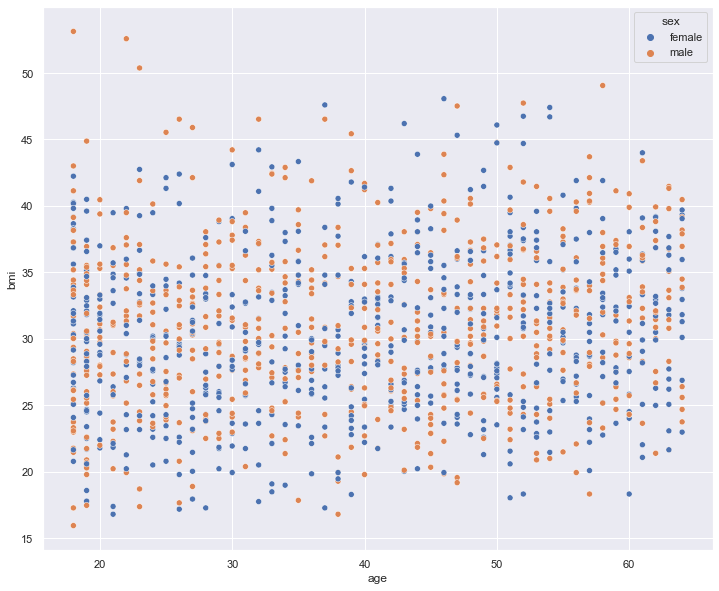

In [387]:
plt.figure(figsize=(12,10))
sns.scatterplot(Insurance_data.age, Insurance_data.bmi ,hue=Insurance_data.sex  )
plt.show()

In [388]:
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(Insurance_data[Insurance_data.sex == 'male'].bmi)  
y = np.array(Insurance_data[Insurance_data.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print('P value = ' ,p_value)
if p_value > 0.05:
	print('BMI has no effect over gender (accept H0)')
else:
	print('BMI significantly has effects over gender (reject H0)')

P value =  0.08997637178984932
BMI has no effect over gender (accept H0)


**Inference:**
* There are 676 male members and 662 female members.
* Accepting nullhypothesis as pvalue > 0.05. Hence,Gender has no impact on bmi.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  4.c) Is the proportion of smokers significantly different in different genders?

In [389]:
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(Insurance_data['sex'],Insurance_data['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('P value = ' , p_value)
if p_value > 0.05:
	print('Smoking habits has no effect over gender (accept H0)')
else:
	print('Smoking habits significantly has effects over gender (reject H0)')

P value =  0.006548143503580696
Smoking habits significantly has effects over gender (reject H0)


**Inference:**
* Rejecting Null hypothesis as the p-value is less than 0.05. 
* Therefore, it is alternate hypothesis. Hence,smoking habits differs with the gender. 
* There is difference in proportion of smokers with respect to the gender

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  4.d) Is the distribution of bmi across women with no children, one child and two children, the same ? 

In [390]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

fem = Insurance_data[Insurance_data['sex'] == 'female'].copy()

zero = fem[fem.children == 0]['bmi']
one = fem[fem.children == 1]['bmi']
two = fem[fem.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print('P value = ' , p_value)
if p_value > 0.05:
	print('The distribution of bmi across women with no children,one child and two children is same (accept H0)')
else:
	print('The distribution of bmi across women with no children,one child and two children is not same (reject H0)')

P value =  0.7158579926754841
The distribution of bmi across women with no children,one child and two children is same (accept H0)


**Inference:**
* Accepting Null hypothesis as the p-value is greater than 0.05.
* Hence,it shows that the number of children is not effecting any difference in women bmi.
